# Data Exploration

In [26]:
# Import required packages
import pandas as pd
import seaborn as sns

In [27]:
merged_file = "../data/merged_troll_data.json"
troll_2016_no_rt = "../data/troll_data_2016_no_rt.csv"
troll_2016 = "../data/troll_data_2016.csv"
troll_june_nov = "../data/troll_jun_to_nov_v2.csv"

merged_df = pd.read_json(merged_file)

In [28]:
merged_df.groupby('troll').count()

,content,followers,following,retweet,account_category,created_at,orig_index
troll,,,,,,,
False,166252,166252,166252,166252,166252,166252,166252
True,166252,166252,166252,166252,166252,166252,166252


In [42]:
merged_df.groupby('account_category').describe()
#merged_df = merged_df.astype({'account_category': 'category', 'content': 'string'})
merged_df.dtypes

content                     string
followers                    int64
following                    int64
retweet                      int64
account_category          category
created_at          datetime64[ns]
troll                         bool
dtype: object

In [45]:
#merged_df = merged_df.drop(columns=['orig_index'])
merged_df = merged_df.reset_index(drop=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332504 entries, 0 to 332503
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   content           332504 non-null  string        
 1   followers         332504 non-null  int64         
 2   following         332504 non-null  int64         
 3   retweet           332504 non-null  int64         
 4   account_category  332504 non-null  category      
 5   created_at        332504 non-null  datetime64[ns]
 6   troll             332504 non-null  bool          
dtypes: bool(1), category(1), datetime64[ns](1), int64(3), string(1)
memory usage: 13.3 MB


In [44]:
merged_df.describe()
# Retweet column with max of 1? Should remove probably

,followers,following,retweet
count,3.325040e+05,332504.000000,332504.000000
mean,7.935872e+03,3008.364465,0.740890
std,2.066285e+05,7711.247498,0.438147
min,0.000000e+00,0.000000,0.000000
25%,6.120000e+02,541.000000,0.000000
50%,1.144000e+03,1135.000000,1.000000
75%,2.431000e+03,2293.000000,1.000000
max,4.086668e+07,680956.000000,1.000000


# Check data balance

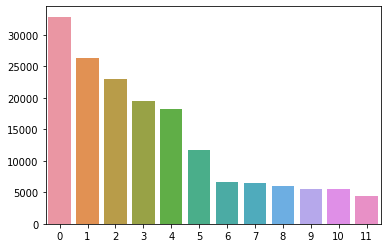

<AxesSubplot:>

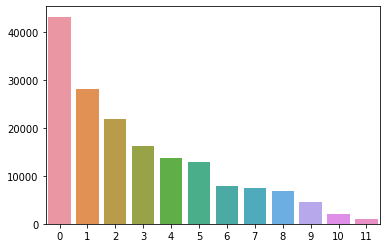

In [55]:
df = merged_df.drop(columns=['retweet'])
troll_df = df[df['troll'] == True]
non_troll_df = df[df['troll'] == False]
troll_dates = troll_df['created_at']
non_dates = non_troll_df['created_at']
troll_binned = pd.cut(troll_dates, 12).value_counts()
non_binned = pd.cut(non_dates, 12).value_counts()
troll_binned.reset_index(name="index", drop=True, inplace=True)
non_binned.reset_index(name="index", drop=True, inplace=True)

import seaborn as sns
sns.barplot(x=troll_binned.index, y=troll_binned.values)
plt.show()
sns.barplot(x=non_binned.index, y=non_binned.values)

# Check for None values

In [33]:
df.isnull().values.any()

df['followers'].min()

0

# Plot follower charts

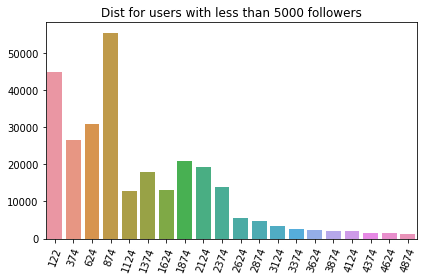

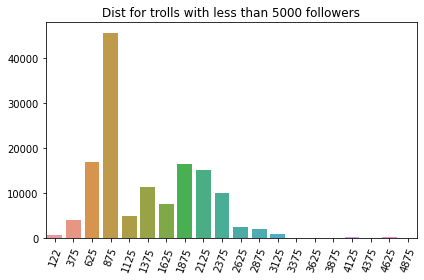

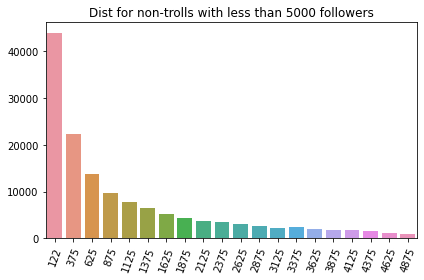

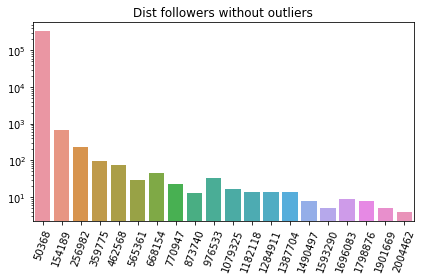

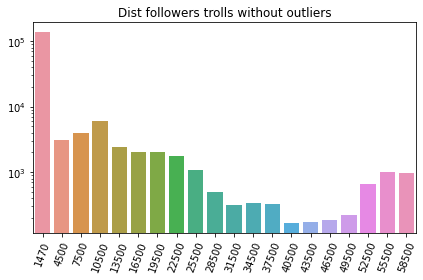

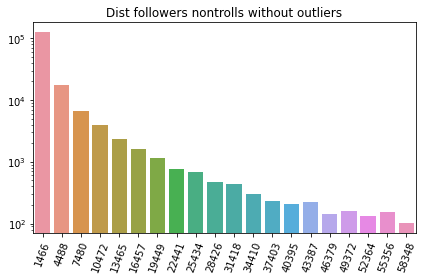

In [124]:
def plot_series(s, title, log=False):
    followers = pd.cut(s, 20).value_counts().sort_values()
    followers.index = [int((bin.left + bin.right)/2) for bin in followers.index]
    sns.barplot(x=followers.index, y=followers.values, log=log).set(title=title)
    plt.xticks(rotation=70)
    plt.tight_layout()
    plt.show()

from scipy import stats
import numpy as np

# Remove outliers
df_trimmed = df[np.abs(stats.zscore(df['followers'])) < 10]

data = df[df['followers'] < 5000]['followers']
plot_series(data, title="Dist for users with less than 5000 followers")
plot_series(df[(df['followers'] <= 5000) & (df['troll'] == True)]['followers'], title="Dist for trolls with less than 5000 followers")
plot_series(df[(df['followers'] <= 5000) & (df['troll'] == False)]['followers'], title="Dist for non-trolls with less than 5000 followers")

plot_series(df_trimmed['followers'], title="Dist followers without outliers", log=True)
plot_series(df_trimmed[(df_trimmed['followers'] <= 60000) & (df_trimmed['troll'] == True)]['followers'], title="Dist followers trolls without outliers", log=True)
plot_series(df_trimmed[(df_trimmed['followers'] <= 60000) & (df_trimmed['troll'] == False)]['followers'], title="Dist followers nontrolls without outliers", log=True)

import matplotlib.pyplot as plt